MSDS 432 <Br>
Mini Programming Assignment: Implement a Recursive Algorithm<Br>
Prepared by Vincent Pun

In an effort to standardize our formatting, please make sure that all work on the assignment be completed within Jupyter notebook with separate paragraphs of Python code and text discussions for each part of the assignment, as described here.  The executive summary should be at the end and tie everything together.   Submission may be made with the ipython notebook or an html/pdf export.

If your timing method is producing zeros (not granular enough), please find a different one. 

In this Mini Programming Assignment, we will explore the differences between iteration and recursion.  We will begin with the base code for recursion as described in Chapter 3 of Grokking Algorithms (Bhargava 2016).  https://github.com/egonSchiele/grokking_algorithms/blob/master/03_recursion/python/03_factorial.py

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np

import pandas as pd

import seaborn as sns
import scipy.stats as stats

import os
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)

In [2]:
os.getcwd()

'/Users/vincentpun/Documents/GitHub/MSDS-432'

**Instructions**

Set up an array of ten random numbers between 100 and 500 (just one array with 10 numbers).<br>
<br>
Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.  
<br>
Calculate the factorial of each of the numbers using recursion.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.<br>
<br>
Organize the results of the study into a table showing the number, it's factorial, the time to calculate the factorial using recursion, the time to calculate factorial using FOR loop, and the difference between times.<br>
<br>
Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.<br>
<br>
Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.<br>

In [3]:
#Set up Array of ten random numbers between 100 and 500 (just one array with 10 numbers)

sys.setrecursionlimit(5000)

array = np.sort(np.random.randint(low=100,high=500,size=10))

**Define Functions**"

In [4]:
#Calculate the factorial of each of the numbers using a simple FOR loop.  Please capture the start/end times and store the results in an array, 
# or linked list, or dictionary. 
def factorial(n):

    fact = 1

    for factor in range(1, n + 1):
        fact *= factor

    return fact

factorials = [factorial(x) for x in array]

In [10]:
#Calculate the factorial of each of the numbers USING RECURSION.  Please capture the start/end times and store the results in an array, or linked list, or dictionary.

#base code from book
def fact_recursive(x):
  if x == 1:
    return 1
  else:
    return x * fact_recursive(x-1)


**Check**

In [12]:
#Check if both functions output equal results

assert factorial(9) == fact_recursive(9)

**Apply Functions to Array**

In [13]:
#For Loop
#Factorial 

time1 = []
factorial_for = []

for items in array:

    start1=time.time()
    
    factorial_for.append(factorial(items))
    
    end1 = time.time()
    
    time_iterative1 = 1000*(end1-start1)

    time1.append(time_iterative1)


In [14]:
time2 = []
fact_rec = []

for items in array:

    start2=time.time()
    
    fact_rec.append(fact_recursive(items))
    
    end2 = time.time()
    
    time_recursive2 = 1000*(end2-start2)

    time2.append(time_recursive2)

**Pandas DF**

In [15]:
n = array.tolist()

df = {'Number':n,
       'Factorial':factorial_for,
       'Time (Recursion)':time2,
       'Time (For Loop)':time1}
df = pd.DataFrame(data=df)

df['Difference (Recursion - For Loop)'] = df['Time (Recursion)'] - df['Time (For Loop)']

df

,Number,Factorial,Time (Recursion),Time (For Loop),Difference (Recursion - For Loop)
0,122,9875044200833601362411579871448208012564404136...,0.535011,0.025034,0.509977
1,131,8471580690878820510984568758152795681633520876...,0.527143,0.031233,0.495911
2,180,2008960624991342996569513368984668389175403407...,0.550985,0.025034,0.525951
3,242,2372472101786237237034263348929581250598543735...,0.750065,0.029802,0.720263
4,250,3232856260909107732320814552024368470994843717...,0.494003,0.029802,0.464201
5,285,3044367737049900539998958460974513321193564462...,0.859022,0.036716,0.822306
6,330,2824084622583871086560106553509844213582306155...,0.528097,0.043154,0.484943
7,349,3531068737901396428982719993329898777843773541...,0.999212,0.048161,0.951052
8,350,1235874058265488750143951997665464572245320739...,0.621080,0.046968,0.574112
9,380,9439316835166588679355422817582993728147585040...,0.712156,0.055075,0.657082


**Matplotlib**

([<matplotlib.axis.XTick at 0x7f8a171c57c0>,
 <a list of 10 Text major ticklabel objects>)

Text(0, 0.5, 'Execution Time (ms)')

Text(0.5, 0, 'Number')

Text(0.5, 1.0, 'Fig 1: Execution time (ms) by Number')

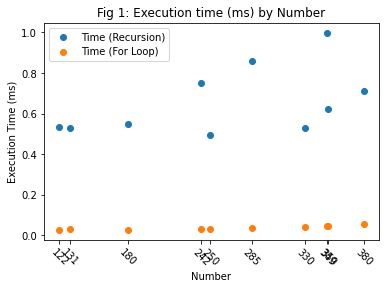

In [16]:
#Use python matplotlib or seaborn to generate a graph that has number on the horizontal axis and with execution time in milliseconds on the vertical axis. The plot should show execution times of recursion and the loop.
plt.scatter(df['Number'], [df['Time (Recursion)']])
plt.scatter(df['Number'], [df['Time (For Loop)']])
plt.legend(('Time (Recursion)',
            'Time (For Loop)'))
plt.xticks(df['Number'], rotation=-45)
plt.ylabel('Execution Time (ms)')
plt.xlabel('Number')
plt.title('Fig 1: Execution time (ms) by Number')

Prepare an executive summary of your results, referring to the table and figures you have generated. Explain how your results relate to big O notation. Describe your results in language that management can understand. This summary should be included as text paragraphs in the Jupyter notebook. Explain how the algorithm works and why it is a useful to data engineers.

**Executive Summary**

In this notebook, we examine the execution times for calculating factorials using recursion and FOR loops on an array with ten items. As we observe in the scatterplot above, the FOR loop outperforms recusion in every instance, and performance time is fairly consistent as the item's number increases. 

Both algorithms' operations are dependent on the size of the number, so per big O notation this would be seen as O(n). Thus, we can see that the recursive algorithm experiences slightly longer execution times when it is performed on the larger numbers (i.e. 359); the execution time increases for the simple FOR loop too, which is clearer when referring to the Pandas dataframe. 

As data engineers, we should gain a deep understanding of how to implement algorithms efficiently based on the problem. While more complex to write, the FOR loop in this case should almost always be more efficient than recusion when calculating factorials, as it requires fewer operations under the hood. To elaborate, the recursive function needs to stack and concatenate operstions during its execution. Values are added to the stack to the nth amount until it starts returning values (essentially popping off the current function call). Comparatively, the for loop has a fixed stack of operations that is executed at once (per number). 